In [1]:
# import sys
# !{sys.executable} -m pip install librosa
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib

In [2]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('data_mfcc.csv')

In [5]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-424.469330,237.982895,6.731316,-3.202654,14.532297,-7.691171,-5.938550,1.828542,0.126493,-1.419745,...,-15.246060,-15.932623,-5.570814,3.378149,3.227192,-0.593816,-2.097961,-2.741678,-3.434451,piano
1,-420.475647,230.228104,8.183341,0.445985,23.258064,4.189878,2.004561,3.607440,-1.887056,-3.405439,...,-10.857403,-14.574149,-10.775605,-6.764171,-3.649573,-1.686252,-3.082775,-4.791152,-5.136883,piano
2,-391.824371,259.276093,12.752640,-20.452869,12.685456,-1.488779,-6.005210,2.188318,-3.297070,-7.162425,...,1.544302,-1.582307,-6.687898,-7.898934,-5.066751,-4.520948,-6.353752,-5.899755,-2.472929,piano
3,-510.576508,229.395294,25.448526,-4.467762,6.040303,2.116656,-4.205454,-14.291451,-13.079196,-5.157303,...,-0.368388,6.425932,10.205118,6.254388,-0.309801,-7.568224,-10.515248,-7.098872,-3.438269,piano
4,-456.584351,236.038055,19.959612,-10.859509,13.760965,0.094559,-6.522711,-5.254314,-5.966574,-4.693297,...,-8.892569,-8.372187,-11.724998,-9.395949,-2.991619,-2.811136,-1.716639,1.816594,-0.005441,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,-126.718475,211.123215,-64.388329,23.175159,28.375416,-1.169698,-7.720967,-0.532982,-5.889307,0.242725,...,-3.405693,-3.522162,-6.648514,-3.480645,-2.026061,-5.091410,-3.487913,-2.062895,-8.505610,cello
2322,-204.178101,220.853699,-68.285461,23.857170,31.525501,-2.056592,-11.131469,0.404449,-9.312475,2.372316,...,-2.582308,-4.884126,-8.726199,-6.733187,-5.179200,-8.332076,-4.879526,1.666614,-6.768103,cello
2323,-326.542847,173.090546,-17.896770,30.417681,-8.306487,17.857340,-14.968207,5.607214,-2.909435,0.612115,...,-1.316044,-4.523128,-5.320628,-4.571884,-4.474178,-1.919236,-4.339386,-4.252269,-4.650919,cello
2324,-314.654755,185.361542,-8.490097,30.651144,-12.311681,22.408638,-7.582389,17.190226,3.917881,5.292466,...,4.141909,1.527676,-4.503474,-3.744816,-2.940274,-0.587636,-2.860113,-0.713387,-3.248610,cello


In [6]:
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()

for i in range(20):
    reshaped = np.array(df[str(i)]).reshape(-1, 1)
    df[str(i)] = scaler.fit_transform(reshaped)

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,label
0,-0.897049,1.648863,0.578732,-1.204811,0.582083,-1.322437,-0.067308,-0.126290,0.615557,-0.201390,...,-1.806189,-1.746684,-0.517352,0.849738,0.908948,0.233492,0.021203,-0.327577,-0.298903,piano
1,-0.863538,1.429153,0.623365,-1.045911,1.106229,-0.474965,0.703220,0.040502,0.351237,-0.442543,...,-1.204803,-1.543959,-1.293078,-0.686028,-0.187274,0.057648,-0.148412,-0.696609,-0.608647,piano
2,-0.623121,2.252145,0.763817,-1.956067,0.471145,-0.880022,-0.073775,-0.092557,0.166144,-0.898811,...,0.494626,0.394815,-0.683843,-0.857856,-0.413186,-0.398639,-0.711777,-0.896226,-0.123961,piano
3,-1.619586,1.405558,1.154068,-1.259907,0.071978,-0.622847,0.100812,-1.637731,-1.117963,-0.655298,...,0.232526,1.589886,1.833903,1.285262,0.345118,-0.889143,-1.428516,-1.112141,-0.299597,piano
4,-1.166531,1.593762,0.985348,-1.538271,0.535750,-0.767083,-0.123975,-0.790392,-0.184284,-0.598947,...,-0.935558,-0.618439,-1.434576,-1.084536,-0.082390,-0.123419,0.086879,0.493195,0.324979,piano
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2321,1.601419,0.887871,-1.607369,-0.056044,1.413623,-0.857262,-0.240213,-0.347711,-0.174141,0.000509,...,-0.183681,0.105330,-0.677973,-0.188831,0.071529,-0.490463,-0.218190,-0.205354,-1.221560,cello
2322,0.951444,1.163557,-1.727161,-0.026342,1.602845,-0.920524,-0.571052,-0.259816,-0.623503,0.259138,...,-0.070851,-0.097915,-0.987633,-0.681336,-0.431111,-1.012097,-0.457869,0.466189,-0.905434,cello
2323,-0.075335,-0.189675,-0.178295,0.259371,-0.789817,0.499933,-0.943238,0.228005,0.217029,0.045370,...,0.102667,-0.044044,-0.480064,-0.354068,-0.318724,0.020146,-0.364840,-0.599576,-0.520229,cello
2324,0.024420,0.157988,0.110850,0.269539,-1.030404,0.824576,-0.226770,1.314049,1.113255,0.613776,...,0.850581,0.858919,-0.358275,-0.228832,-0.074205,0.234487,-0.110063,0.037641,-0.265090,cello


In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)

In [9]:
test_set['label'].value_counts() / len(test_set)

piano              0.309013
acoustic_guitar    0.274678
violin             0.248927
cello              0.167382
Name: label, dtype: float64

In [10]:
test_set.shape, train_set.shape

((466, 21), (1860, 21))

In [11]:
X_train = train_set.drop(['label'], axis=1)
y_train = train_set['label'].copy()

In [12]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
2146,-0.661846,0.612410,0.279005,-1.048350,0.825719,-0.190457,-0.793781,-1.530596,0.256258,-0.284033,-0.440639,-1.263967,-1.254092,-1.082924,-1.074404,-1.172552,-0.149578,0.142011,-0.788948,-1.215978
1472,-1.922252,0.292645,1.740288,-0.650523,1.077952,0.711669,1.823562,0.373177,0.748341,-0.487877,-0.513463,-0.940232,0.031171,0.517950,0.051241,-0.711407,-0.172429,0.626825,-0.135055,-0.319146
2307,2.118741,-1.003487,-1.133666,1.218908,-1.108069,1.909438,0.070728,0.690648,0.862172,1.457760,0.493494,0.774026,0.414634,0.096931,0.636146,0.072623,0.798905,0.279149,0.513700,0.315871
287,-0.380373,1.741804,-0.426302,-0.853886,1.102576,-1.143439,1.035384,-0.525891,-0.462977,-0.349719,-0.043697,-0.334326,-0.363554,-0.665270,-0.126929,-0.107563,-0.016193,0.131541,-0.265789,-0.015098
635,1.603128,0.502856,-1.110737,0.695850,-0.670694,0.436243,0.739122,0.081982,0.293098,-0.012348,0.907142,-0.065258,0.582744,0.354248,0.096094,-0.392809,0.216633,0.042246,-0.383491,-1.205494


In [13]:
y_train.head()

2146              cello
1472    acoustic_guitar
2307              cello
287               piano
635               piano
Name: label, dtype: object

In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels_enc = label_encoder.fit(y_train)

In [15]:
labels_enc

LabelEncoder()

In [16]:
label_encoder.classes_

array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype=object)

In [17]:
y_train = label_encoder.transform(y_train)

In [18]:
y_train

array([1, 0, 1, ..., 3, 2, 0])

In [19]:
X_test = test_set.drop(['label'], axis=1)
y_test = test_set['label'].copy() 
y_test = label_encoder.transform(y_test)

In [20]:
num_labels = np.unique(y_train).shape[0]
num_labels

4

In [21]:
# models

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score 

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict

In [25]:
display_labels = label_encoder.inverse_transform(range(len(label_encoder.classes_)))
display_labels

array(['acoustic_guitar', 'cello', 'piano', 'violin'], dtype=object)

In [26]:
# svm

In [27]:
from sklearn.svm import SVC

model_svm = SVC()

# parameters_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
#     'gamma': ['scale', 'auto'],
#     'probability': [True, False],
# }

# grid_svm = GridSearchCV(model_svm, parameters_svm, scoring=make_scorer(accuracy_score))
# grid_svm.fit(X_train, y_train)

# model_svm = grid_svm.best_estimator_

model_svm = SVC(kernel='rbf', C=10, gamma='scale', probability=True)


model_svm.fit(X_train, y_train)

SVC(C=10, probability=True)

In [28]:
# grid_svm.best_params_

In [29]:
# train

In [30]:
cv_score_svm_train = cross_val_score(model_svm, X_train, y_train, cv=5, scoring='accuracy')
cv_score_svm_train

array([0.75268817, 0.76612903, 0.76612903, 0.79032258, 0.7688172 ])

In [31]:
print('Accuracy cross validation Support Vector Machines Train:', cv_score_svm_train.mean())

Accuracy cross validation Support Vector Machines Train: 0.7688172043010753


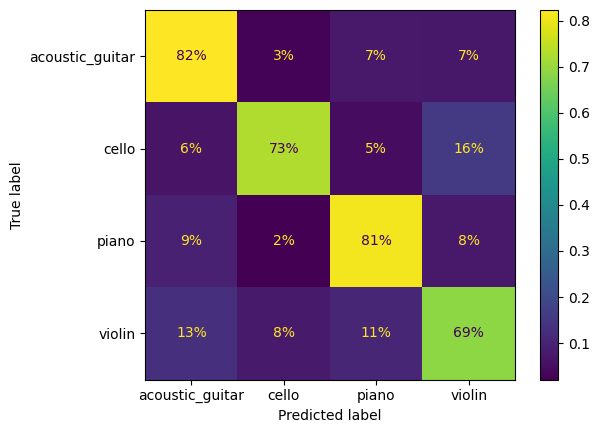

In [32]:
y_train_pred_svm = cross_val_predict(model_svm, X_train, y_train, cv=5)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_svm, normalize='true', values_format='.0%', display_labels=display_labels)
plt.show()

In [33]:
# test

In [34]:
cv_score_svm_test = cross_val_score(model_svm, X_test, y_test, cv=5, scoring='accuracy')
cv_score_svm_test

array([0.71276596, 0.64516129, 0.72043011, 0.6344086 , 0.64516129])

In [35]:
print('Accuracy cross validation Support Vector Machines Test:', cv_score_svm_test.mean())

Accuracy cross validation Support Vector Machines Test: 0.6715854495538778


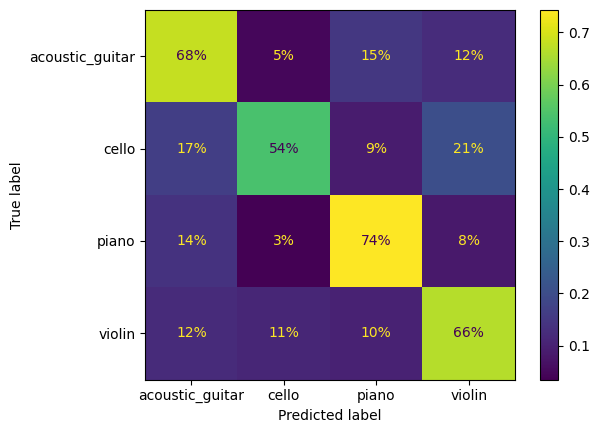

In [36]:
y_test_pred_svm = cross_val_predict(model_svm, X_test, y_test, cv=5)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_svm, normalize='true', values_format='.0%', display_labels=display_labels)
plt.show()

In [37]:
model_name = 'Support Vector Machines Test'
average = 'macro'

accuracy_score_svm_test = accuracy_score(y_test, y_test_pred_svm)
precision_score_svm_test = precision_score(y_test, y_test_pred_svm, average=average)
f1_score_svm_test = f1_score(y_test, y_test_pred_svm, average=average)
recall_score_svm_test = recall_score(y_test, y_test_pred_svm, average=average)

print(f'Accuracy {model_name}:', accuracy_score_svm_test)
print(f'Precision {model_name}:', precision_score_svm_test)
print(f'F1 score {model_name}:', f1_score_svm_test)
print(f'Recall score {model_name}:', recall_score_svm_test)

Accuracy Support Vector Machines Test: 0.6716738197424893
Precision Support Vector Machines Test: 0.6649780096383286
F1 score Support Vector Machines Test: 0.6594322323348806
Recall score Support Vector Machines Test: 0.6562494243663425


In [38]:
re = classification_report(y_test, y_test_pred_svm, target_names=display_labels, zero_division=0.0)

print(re)

                 precision    recall  f1-score   support

acoustic_guitar       0.65      0.68      0.66       128
          cello       0.64      0.54      0.58        78
          piano       0.74      0.74      0.74       144
         violin       0.64      0.66      0.65       116

       accuracy                           0.67       466
      macro avg       0.66      0.66      0.66       466
   weighted avg       0.67      0.67      0.67       466

